# CartPole Environment

#### NOTE: This version of the demo was tested and confirmed to run in Google Colab

The **CartPole environment** is a classic problem in reinforcement learning and control theory. It involves a cart that can move along a frictionless track with a pole attached to it by an un-actuated joint. The goal is to balance the pole upright by applying forces to the cart to move it left or right.

### Key Features of the CartPole Environment:
- **State Space**: The state of the environment is represented by four continuous values:
  - **Cart Position**: The position of the cart on the track.
  - **Cart Velocity**: The velocity of the cart.
  - **Pole Angle**: The angle of the pole with respect to the vertical.
  - **Pole Velocity at Tip**: The velocity of the tip of the pole.

- **Action Space**: The agent can take one of two discrete actions:
  - **Push cart to the left**.
  - **Push cart to the right**.

- **Rewards**: The agent receives a reward of +1 for every time step the pole remains upright. The episode ends if the pole falls over or the cart moves too far from the center.

### Graphical Capabilities:
Graphically, the CartPole environment can be rendered to visualize the cart and pole dynamics. This helps in understanding how the agent's actions affect the environment. The graphical representation shows:
- The cart moving along the track.
- The pole attached to the cart, swinging as the cart moves.
- The effects of the agent's actions in real-time, making it easier to debug and analyze the agent's performance.

In [1]:
!pip install pyvirtualdisplay==3.0 gymnasium[classic_control]

In [2]:
!apt-get update
!apt-get install -y xvfb

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [3]:
%env PYTHON_FLAGS=-Xfrozen_modules=off

env: PYTHON_FLAGS=-Xfrozen_modules=off


##### This demo randomly selects an action from the set of all possible actions that can be taken in the environment. Think of it like this: the environment has a list of things you can do (the action space), and this function picks one of those things at random.

**In More Detail**

- env: This refers to your Gym environment object, which you created with

    - *env = gym.make('CartPole-v1', render_mode='rgb_array') # It represents the CartPole simulation.*

- action_space: This is an attribute of the environment object. It describes the format and valid values for actions that can be taken in the environment. For the CartPole environment, the action_space is typically Discrete(2), which means there are two discrete actions:

    - 0: Push the cart to the left
    - 1: Push the cart to the right

- sample(): This is a method of the action_space object. It randomly samples an action from the possible actions defined by the action_space. In the case of CartPole, it will return either 0 or 1.

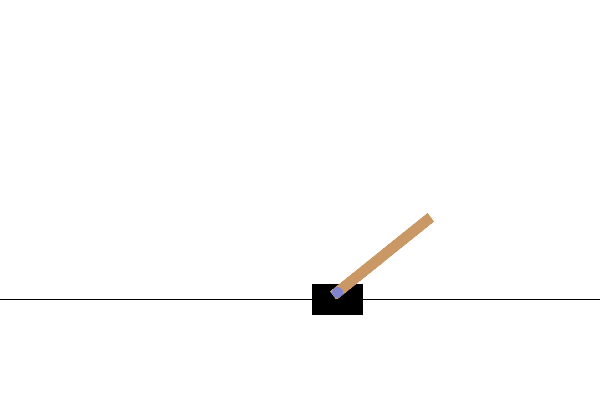

In [ ]:
import gymnasium as gym
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay
from PIL import Image
import time

display = Display(visible=0, size=(400, 300))
display.start()

env = gym.make('CartPole-v1', render_mode='rgb_array')

state, info = env.reset()
for _ in range(100):
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)
    try:
       img = env.render()
       if img is not None:
           img = Image.fromarray(img)
           ipythondisplay.display(img)
           ipythondisplay.clear_output(wait=True)
           time.sleep(0.5)
    except Exception as e:
       print(f"Error during rendering: {e}")

display.stop()
env.close()